# Exploring Neural Networks with fashion MNIST

    Introducing the Fashion MNIST dataset
    Comparing neural network depth:
    3, 6 and 12 layers (NN-3 vs NN-6 vs NN-12)
    Improving predictions with epochs (5 vs 50)
    Visualizing predictions 

As described in this blog: https://medium.com/p/b0a8214b7b7b


In [1]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 

print (tf.__version__) # 1.12.0

Using TensorFlow backend.


1.10.0


### Loading the fashion MNIST data 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Exploring and Visualizing the data

In [3]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


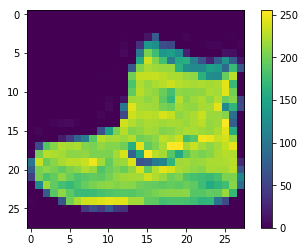

In [4]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### Normalizing the data 

In [5]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

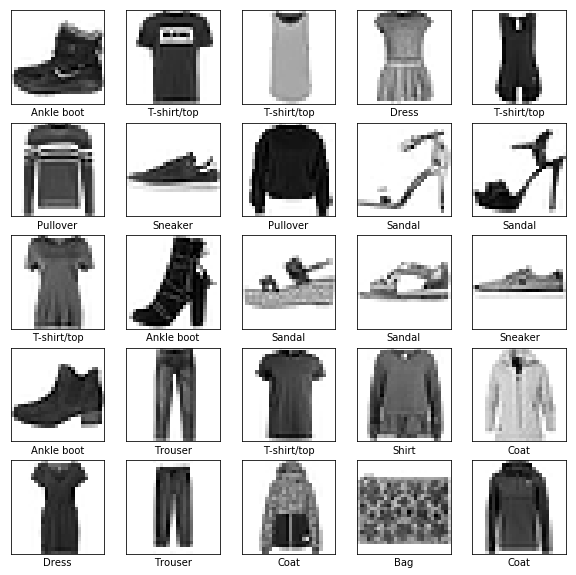

In [6]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
	

### Training the first NN model 

Step 1 - Build the architecture

Step 2 - Compile the model 

Step 3 - Train the model

Step 4 - Evaluate the model 

In [42]:
# Step 1 - Build the architecture
# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary() 

# Step 2 - Compile the model
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [44]:
#Step 3 - Train the model, by fitting it to the training data
# 5 epochs, and split the training set into 80/20 for validation
model_3.fit(train_images, train_labels, epochs=5, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 131us/step - loss: 0.2851 - acc: 0.8942 - val_loss: 0.3404 - val_acc: 0.8758
Epoch 2/5
48000/48000 [==============================] - 7s 142us/step - loss: 0.2720 - acc: 0.8995 - val_loss: 0.3585 - val_acc: 0.8711
Epoch 3/5
48000/48000 [==============================] - 7s 139us/step - loss: 0.2614 - acc: 0.9029 - val_loss: 0.3353 - val_acc: 0.8792
Epoch 4/5
48000/48000 [==============================] - 7s 153us/step - loss: 0.2496 - acc: 0.9070 - val_loss: 0.3435 - val_acc: 0.8796
Epoch 5/5
48000/48000 [==============================] - 6s 129us/step - loss: 0.2424 - acc: 0.9089 - val_loss: 0.3275 - val_acc: 0.8833


In [46]:
#Step 4 - Evaluate the model
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 1s 93us/step
Model - 3 layers - test loss: 35.69996170520782
Model - 3 layers - test accuracy: 88.06


### Is deeper more accurate? 

Comparing network depth, with a NN-6 and NN-12

In [45]:
# Model a simple 6-layer neural network 
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_6.summary() 
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#Train the NN-6 with 5 epochs 
model_6.fit(train_images, train_labels, epochs=5, validation_split=0.2)

#Evaluate the model with test datasets
test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 151us/step - loss: 0.5149 - acc: 0.8132 - val_loss: 0.4374 - val_acc: 0.8389
Epoch 2/5
48000/48000 [==============================] - 8s 171us/step - loss: 0.3791 - acc: 0.8606 - val_loss: 0.3798 - val_acc: 0.8633
Epoch 3/5
48000/48000 [==============================] - 8s 162us/step - loss: 0.3472 - acc: 0.8713 - val_loss: 0.3473 - val_acc: 0.8722
Epoch 4/5
48000/48000 [==============================] - 11s 223us/step - loss: 0.3261 - acc: 0.8792 - val_loss: 0.3574 - val_acc: 0.8736
Epoch 5/5
10000/10000 [==============================] - 0s 46us/step
Model - 6 layers - test loss: 37.51054655075073
Model - 6 layers - test accuracy: 86.6


In [47]:
# Model a simple 12-layer neural network 
model_12 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_12.summary() 
model_12.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#Train the NN-12 with 5 epochs 
model_12.fit(train_images, train_labels, epochs=5, validation_split=0.2)

#Evaluate the model
test_loss, test_acc = model_12.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s 236us/step - loss: 0.6117 - acc: 0.7745 - val_loss: 0.5546 - val_acc: 0.8093
Epoch 2/5
48000/48000 [==============================] - 10s 216us/step - loss: 0.4404 - acc: 0.8433 - val_loss: 0.4343 - val_acc: 0.8474
Epoch 3/5
48000/48000 [==============================] - 11s 230us/step - loss: 0.3945 - acc: 0.8593 - val_loss: 0.4056 - val_acc: 0.8628
Epoch 4/5
48000/48000 [==============================] - 10s 212us/step - loss: 0.3701 - acc: 0.8670 - val_loss: 0.3746 - val_acc: 0.8668
Epoch 5/5
10000/10000 [==============================] - 1s 63us/step
Model - 12 layers - test loss: 39.30484714031219
Model - 12 layers - test accuracy: 86.21


### Does increasing epochs improve our classification?




#### Re-train the NN-3 with 50 epochs, and plot the loss and accuracy

In [48]:
# NN-3, 50 epochs 
history_NN3_50=model_3.fit(train_images, train_labels, epochs=50, validation_split=0.2)

test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 131us/step - loss: 0.2313 - acc: 0.9147 - val_loss: 0.3334 - val_acc: 0.8799
Epoch 2/50
48000/48000 [==============================] - 6s 133us/step - loss: 0.2244 - acc: 0.9163 - val_loss: 0.3167 - val_acc: 0.8909
Epoch 3/50
48000/48000 [==============================] - 6s 134us/step - loss: 0.2198 - acc: 0.9183 - val_loss: 0.3304 - val_acc: 0.8853
Epoch 4/50
48000/48000 [==============================] - 5s 114us/step - loss: 0.2090 - acc: 0.9221 - val_loss: 0.3487 - val_acc: 0.8812
Epoch 5/50
48000/48000 [==============================] - 5s 110us/step - loss: 0.2052 - acc: 0.9233 - val_loss: 0.3338 - val_acc: 0.8909
Epoch 6/50
48000/48000 [==============================] - 5s 110us/step - loss: 0.1975 - acc: 0.9274 - val_loss: 0.3323 - val_acc: 0.8899
Epoch 7/50
48000/48000 [==============================] - 5s 111us/step - loss: 0.1911 - acc: 0.9296 - val_loss: 0.3467 - 

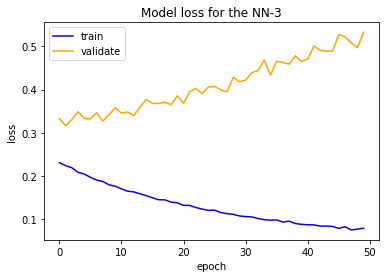

In [55]:
#Plot loss results for training data and testing data 
plt.plot(history_NN3_50.history['loss'], 'blue')
plt.plot(history_NN3_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


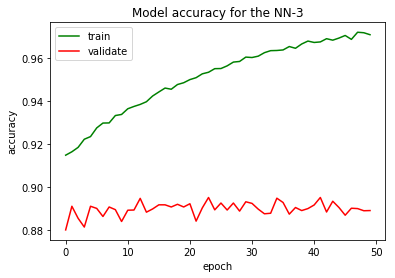

In [56]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN3_50.history['acc'], 'green')
plt.plot(history_NN3_50.history['val_acc'], 'red')
plt.title('Model accuracy for the NN-3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

#### Re-train the NN-6 with 50 epochs, and plot the loss and accuracy

In [51]:
# NN-6, 50 epochs
history_NN6_50=model_6.fit(train_images, train_labels, epochs=50, validation_split=0.2)

test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 14s 285us/step - loss: 0.5165 - acc: 0.8118 - val_loss: 0.4247 - val_acc: 0.8471
Epoch 2/50
48000/48000 [==============================] - 8s 164us/step - loss: 0.3797 - acc: 0.8601 - val_loss: 0.3756 - val_acc: 0.8641
Epoch 3/50
48000/48000 [==============================] - 8s 171us/step - loss: 0.3435 - acc: 0.8745 - val_loss: 0.3721 - val_acc: 0.8639
Epoch 4/50
48000/48000 [==============================] - 9s 190us/step - loss: 0.3224 - acc: 0.8799 - val_loss: 0.3441 - val_acc: 0.8753
Epoch 5/50
48000/48000 [==============================] - 8s 166us/step - loss: 0.3056 - acc: 0.8860 - val_loss: 0.3323 - val_acc: 0.8768
Epoch 6/50
48000/48000 [==============================] - 8s 167us/step - loss: 0.2889 - acc: 0.8920 - val_loss: 0.3353 - val_acc: 0.8777
Epoch 7/50
48000/48000 [==============================] - 8s 169us/step - loss: 0.2759 - acc: 0.8956 - val_loss: 0.3445 -

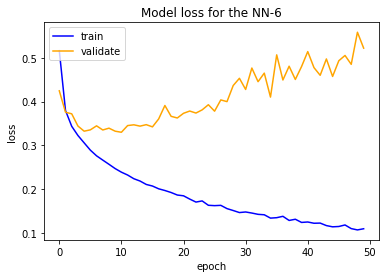

In [57]:
#Plot loss results for training data and testing data
plt.plot(history_NN6_50.history['loss'], 'blue')
plt.plot(history_NN6_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-6')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


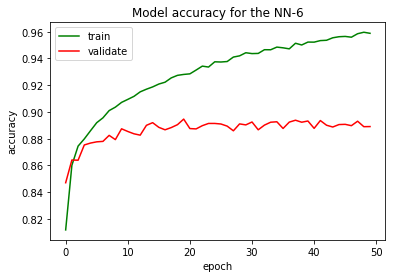

In [58]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN6_50.history['acc'], 'green')
plt.plot(history_NN6_50.history['val_acc'],'red')
plt.title('Model accuracy for the NN-6')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

#### Re-train the NN-12 with 50 epochs, and plot the loss and accuracy

In [59]:
# NN-12, 50 epochs 
history_NN12_50=model_12.fit(train_images, train_labels, epochs=50, validation_split=0.2)

test_loss, test_acc = model_12.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 15s 304us/step - loss: 0.6293 - acc: 0.7645 - val_loss: 0.4920 - val_acc: 0.8313
Epoch 2/50
48000/48000 [==============================] - 11s 240us/step - loss: 0.4316 - acc: 0.8455 - val_loss: 0.4349 - val_acc: 0.8511
Epoch 3/50
48000/48000 [==============================] - 16s 326us/step - loss: 0.3959 - acc: 0.8608 - val_loss: 0.4184 - val_acc: 0.8561
Epoch 4/50
48000/48000 [==============================] - 16s 338us/step - loss: 0.3695 - acc: 0.8686 - val_loss: 0.4131 - val_acc: 0.8584
Epoch 5/50
48000/48000 [==============================] - 16s 326us/step - loss: 0.3499 - acc: 0.8749 - val_loss: 0.3877 - val_acc: 0.8676
Epoch 6/50
48000/48000 [==============================] - 15s 319us/step - loss: 0.3371 - acc: 0.8788 - val_loss: 0.3644 - val_acc: 0.8761
Epoch 7/50
48000/48000 [==============================] - 12s 244us/step - loss: 0.3236 - acc: 0.8835 - val_loss: 0.

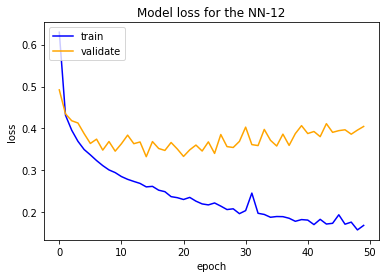

In [60]:
#Plot loss results for training data and testing data
plt.plot(history_NN12_50.history['loss'], 'blue')
plt.plot(history_NN12_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-12')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


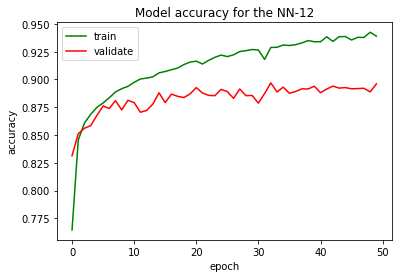

In [61]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN12_50.history['acc'], 'green')
plt.plot(history_NN12_50.history['val_acc'], 'red')
plt.title('Model accuracy for the NN-12')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

### Making predictions with the NN-3

In [62]:
# confidence of the model that the image corresponds to the label 
predictions = model_3.predict(test_images)
predictions.shape #(10000, 10)
predictions[0]

array([1.8775668e-18, 2.0068341e-18, 3.0247242e-21, 1.4183409e-14,
       2.7651410e-19, 2.5615962e-10, 5.6675360e-19, 4.3104574e-08,
       8.6629236e-18, 1.0000000e+00], dtype=float32)

In [63]:
np.argmax(predictions[0])

9

In [64]:
class_names[9]

'Ankle boot'

In [65]:
#Ankle boot has the highest confidence value 
test_labels[0]


9

In [66]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

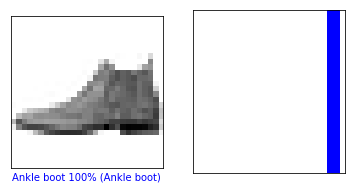

In [67]:
# look at 0th image, predictions, prediction array
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

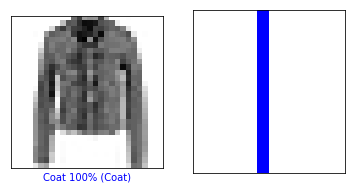

In [68]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

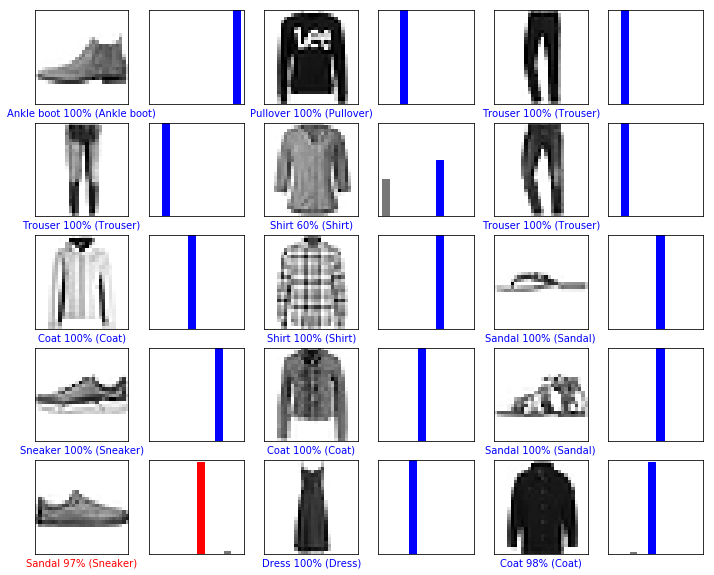

In [69]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of the first 15 images, with NN-3")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

### Making predictions with the NN-12

In [72]:
predictions = model_12.predict(test_images)

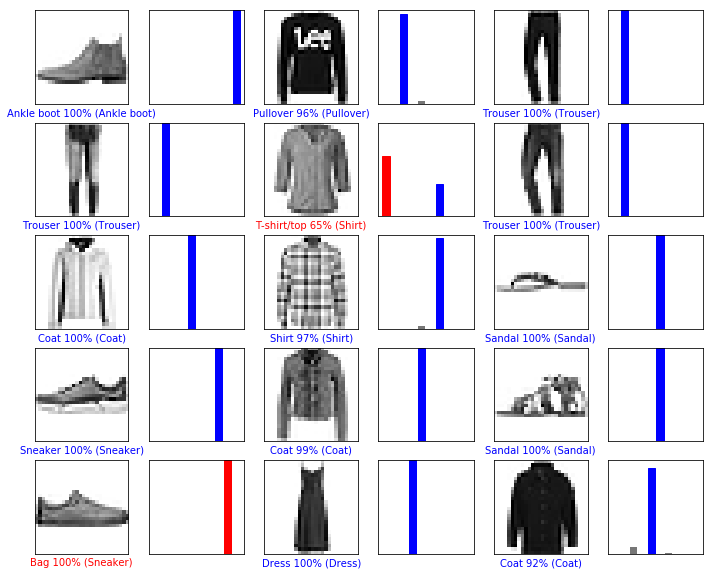

In [73]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    